# _Ejercicio 1_
____

<img src="datos_monte_chaco.png" width="1000" height="400">

A continuación se describe paso a paso la construcción de una tabla de frecuencias utilizando las librerías **_Pandas_** y **_numpy_**. El análisis visual de los datos corre a cuenta de las librerías **_matplotlib_** y **_seaborn_** para la representación de: gráfica de barras a partir del histograma, ojiva y polígono de frecuencias.

In [1]:
# Importación de las librerías:

import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
import math
import numpy as np
import csv
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

### **Construcción de la tabla de fecuencias**

Los datos son previamente almacenados en una rchivo **.txt** sin ningún orden en especial o tipo de arreglo. Para este ejemplo, dicho archivo es llamado **data_ejercicio_1.txt**.

Necesitaremos la creación de dos objetos de tipo _listas_ para la visualización de los datos en el archivo **.txt**. Los llamaremos `listas` y `datos`. 

Después se lleva a cabo la iteración de cada uno de los datos en el archivo **.txt**, dentro de un _loop_, en el objeto `listas`. Posteriormente se crea un tercer objeto, de tipo arreglo, que nos permitirá llegar a la visualización de cada uno de los datos. Lo llamaremos `np_datos`.

In [2]:
# Carga de los datos mediante la lectura del archivo fuente.txt:

listas = []
datos=[]

with open('data_ejercico_1.txt', newline='') as archivo:
    for linea in csv.reader(archivo):
        listas.append(linea)

# Adisión de cada uno de los datos al objeto arreglo:

for lista in listas:
    for elemento in lista:
        datos.append(float(elemento))
        np_datos=np.sort(np.array(datos))

print('los datos, ordenados, son los siguientes '+ str(np.sort(np_datos)), end=' ')

los datos, ordenados, son los siguientes [119. 125. 126. 128. 132. 135. 135. 135. 136. 138. 138. 140. 140. 142.
 142. 144. 144. 145. 145. 145. 146. 146. 147. 147. 148. 149. 150. 150.
 152. 153. 154. 156. 157. 158. 161. 161. 163. 164. 165. 168. 173. 176.] 

#### _Agrupamiento (rango ($R$), amplitud ($A$)) e intervalos de clases ($k$) de los datos_


Para calcular el número de clases _(**$k$**)_ utilizamos la función `histogram()` de la librería **_numpy_**. Esta función nos permite el cálculo de las clases mediante la regla de **_Sturges_** y **_$\sqrt{n}$_** que ya vienen como `parámetros` integrados. Además de calcular, en una lista, los límites superiores e inferiores para cada intervalo y la frecuencia absoluta respectivamente para cada una de ellas.

Tomando en cuenta lo anterior, la amplitud (**$A$**) es calculada aprovechando el resultado de los límites superiores e inferiores. 

Todas las medidas de posición son calculadas utilizando el objeto `np_datos` y las correspondientes funciones de **_numpy_**:

In [3]:
# Número de datos
np_datos=np.array(datos)
print('El número total de datos(n) es: '+str(len(np_datos)))

# Máximos y Mínimos
print('El dato mayor es: '+np_datos.max().astype(str))
print('El dato menor es: '+np_datos.min().astype(str))

# Rango
rango=np_datos.max().astype(float)-np_datos.min().astype(float)
print('El rango(R) es igual a: '+ str(round(rango,2)))

# Clases (sturges)
sturges=np.histogram(np_datos, bins='sturges')
sturges_a=sturges[1][1]-sturges[1][0]
print('Utilizando el método de Sturges tenemos un número de clases (k) igual a ' + str(len(sturges[0]))+' con una aplitud (A) igual a '+
      str(round(sturges_a,3)))

# Clases (raíz cuadrada)
sqrt=np.histogram(np_datos, bins='sqrt')
sqrt_a=sqrt[1][1]-sqrt[1][0]
print('Utilizando la raíz cuadrada, del número total de datos, tenemos un número de clases igual a :'+str(len(sqrt[0]))+
      ' con una aplitud (A) igual a '+str(round(sqrt_a,3)))

El número total de datos(n) es: 42
El dato mayor es: 176.0
El dato menor es: 119.0
El rango(R) es igual a: 57.0
Utilizando el método de Sturges tenemos un número de clases (k) igual a 7 con una aplitud (A) igual a 8.143
Utilizando la raíz cuadrada, del número total de datos, tenemos un número de clases igual a :7 con una aplitud (A) igual a 8.143


#### _Medidas de tendencia central; media, mediana y moda_

Posteriormente realizamos calculamos las medidas de tendencia central `media`, `mediana` y `moda` para los datos no agrupados. Todas las medidas de centralización son calculadas utilizando el objeto `np_datos` y las funciones pertinentes de **_numpy_**:

In [4]:
# media 
print('la media es igual a: '+ str(round(np.mean(np_datos),3)))

# mediana
print('la mediana es igual a: '+ str(round(np.median(np_datos),3)))

# moda
print('la moda es igual a: '+ str(stats.mode(np_datos)))

la media es igual a: 147.095
la mediana es igual a: 146.0
la moda es igual a: ModeResult(mode=array([135.]), count=array([3]))


Para la presentación de los intervalos de clase es necesario agrupar los respectivos límites de clase obtenidos con la función `histogram()`. Los intervalos son agrupados con ayuda de la creación de una función nombrada `lc`. Esta función tiene la tarea de recibir los parámetros `start`, `stop` y `step`. Todos ellos salen del objeto **sturges** creado en la parte de _**"Agrupameinto"**_ de este script, debido a que se obtuvieron el mismo número de clases (**$k$**) y la misma amplitud (**$A$**) para ambos métodos. Por lo tanto no habrá ninguna diferencia al momento de imprimir la tabla de frecuencias.

In [5]:
# Creación de los intervalos
""""""

# La función "lc" recibe como parámetros dato menor, dato mayor y amplitud para agrupar los límites de clase:
def lc(start, stop, step):
    i=start
    while i <= stop:
        yield i
        i+=step
        yield i

# Ejecución de la función "lc" y alojamiento de los resultado en una variable llamda "l_inter"
l_inter=[]
for i in lc(sturges[1].min(), sturges[1].max(),round(sturges_a,3)):
    l_inter.append(round(i,2))

# Construcción de una tupla para cada intervalo de clase, y creación de una lista de listas "t_iter" que aloja a cada uno de ellos.
t_iter=np.array([i for i in zip(l_inter[::2],l_inter[1::2])]).tolist()
t_iter

[[119.0, 127.14],
 [127.14, 135.29],
 [135.29, 143.43],
 [143.43, 151.57],
 [151.57, 159.72],
 [159.72, 167.86],
 [167.86, 176.0]]

#### _Medidas de agrupamiento: Marcas de Clase ($x_i$), Frecuencias absolutas ($n_i$), Frecuencias relativas ($f_i$), Frecuencias absolutas acumuladas ($N_i$) y Frecuencias relativas acumuladas ($F_i$)._

Las marcas de clase, `macl`, son calculadas con la función `mean()` sobre el objeto `t_iter` y redondeado a **1** decimales. Las frecuencias absolutas, `frec_abs`, son extraidas del objeto `sturges` que alojaba dos arreglos, uno para los límites de clase y otro sus frecuencias absolutas.

Para la frecuencia relativa, `frec_re`, el ćalculo lo realizamos convirtiendo en un arreglo la variable `frec_abs` y dividiendo cada uno de sus elementos entre el número total de datos. Mientras que la frecuencia absoluta acumulada. `frec_abs_ac` es calculada mediante el método `cumsum()` de _numpy_ sobre la variable `frec_abs`.

Por último; para la frecuencia relativa acumulada, `frec_re_ac`, es necesario convertir en un arreglo a la variable `frec_re`. Y, a cada elemento, hay que dividirlo entre el número total de datos.

Todos estos datos ahora podemos convertirlos en un _DataFrame_ de nombre **df_frec** para poderlos representar como una tabla de frecuencias.

In [6]:
# Cálculo de las marcas de clase "xi".
""""""

np_titer=np.array(t_iter)
macl=[round(np.mean(x),1) for x in np_titer]

# Frecuecias absolutas "ni".
""""""

frec_abs=sturges[0]
    

# Cálulo de la frecuencia relativa "fi".
""""""

np_frec=np.array(frec_abs)
frec_re=[(f/(len(np_datos))) for f in np_frec]


# Cálculo de la frecuencia absoluta acumulada "Ni".
""""""

frec_abs_ac=list(np.cumsum(frec_abs))


# Cálculo de la frecuencia relativa acumulada "Fi".
""""""

np_frec_ac=np.array(frec_abs_ac)
frec_re_ac=[(f/(len(np_datos))) for f in np_frec_ac]

df_frec=pd.DataFrame({'$ci$':t_iter,'$x_i$':macl, '$n_i$':frec_abs, '$f_i$':frec_re, '$N_i$':frec_abs_ac, '$F_i$':frec_re_ac})
df_frec

,$ci$,$x_i$,$n_i$,$f_i$,$N_i$,$F_i$
0,"[119.0, 127.14]",123.1,3,0.071429,3,0.071429
1,"[127.14, 135.29]",131.2,5,0.119048,8,0.190476
2,"[135.29, 143.43]",139.4,7,0.166667,15,0.357143
3,"[143.43, 151.57]",147.5,13,0.309524,28,0.666667
4,"[151.57, 159.72]",155.6,6,0.142857,34,0.809524
5,"[159.72, 167.86]",163.8,5,0.119048,39,0.928571
6,"[167.86, 176.0]",171.9,3,0.071429,42,1.000000


### **Reprecentación gráfica de los datos**

#### _Histograma, Pólígono de Frecuencias y Ojiva_

Todas las representaciones gráficas para los datos son obtenidas mediante la librería `matplotlib` y `seaborn` para dar estilo. Cabe señalar que para este no se presentaron las respectivas gráficas para el método **$\sqrt{n}$** puesto que los valores en **$k$** fueron los mismos. Por tanto no existe la comparación de gráficos.

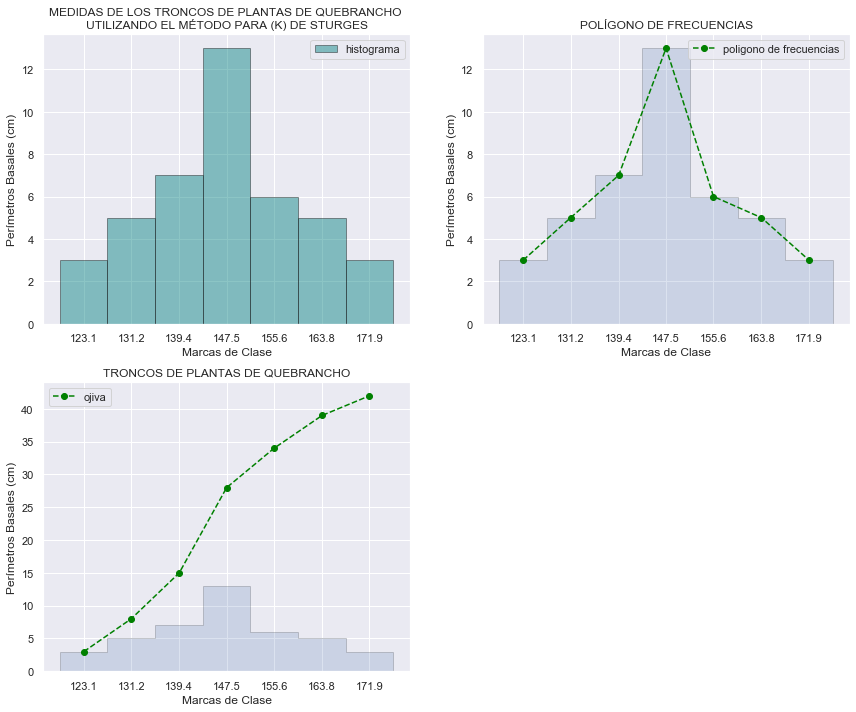

In [7]:
fig = plt.figure(figsize=(12,10))

# HISTOGRAMA:
""""""

ax1 = fig.add_subplot(221)

plt.hist(np_datos, bins=len(sturges[0]), histtype='bar', edgecolor='k',alpha=.45, color='teal') 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('MEDIDAS DE LOS TRONCOS DE PLANTAS DE QUEBRANCHO \n'+ 'UTILIZANDO EL MÉTODO PARA (K) DE STURGES')
plt.legend(['histograma']) 


# POLÍGONO DE FRECUENCIAS:
""""""

ax2 = fig.add_subplot(222)

plt.plot(macl,frec_abs, color='green', marker='o', linestyle='dashed', )
plt.xticks(macl)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.hist(np_datos, bins=len(sturges[0]), histtype='stepfilled', edgecolor='k',alpha=0.2) 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('POLÍGONO DE FRECUENCIAS')
plt.legend(['poligono de frecuencias']) 

ax3 = fig.add_subplot(223)

plt.plot(macl,frec_abs_ac, color='green', marker='o', linestyle='dashed', )
plt.xticks(macl)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.hist(np_datos, bins=len(sturges[0]), histtype='stepfilled', edgecolor='k',alpha=0.2) 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('TRONCOS DE PLANTAS DE QUEBRANCHO')
plt.legend(['ojiva']) 

fig.tight_layout()

### **Medidas de Dispersión**

Todos los cuartiles son calculados con ayuda de la libreía _Scipy Statistics (numpy)_, en el apartado de _Averages and variances_. Además de la varianza, desviasión estandar y el coeficiente de relación. 

Mientras que con ayuda de la librería _Scipy Statistics (scipy.stats)_, en el apartado de _Summary statistics_, pudimos obtener la qurtosis (**$m_4$**) y el coeficiente de variación.

El quartil Q1 (25%) :  138.5
El quartil Q2 (50%) :  146.0
El quartil Q3 (75%) :  155.5


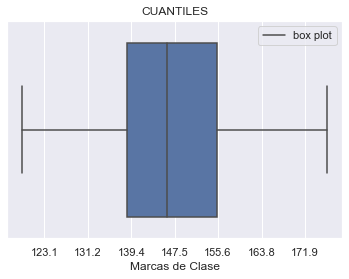

La varianza es igual a: 162.94331065759638
La desviasión estandar es ingual a: 12.764925015745153
El coeficiente de relación (Pearson) es ingual a: 1.0
El coeficiente de variación es aigual a: 0.08678000172568734
La Curtosis es igual a: -0.27311149320852257


In [8]:
print("El quartil Q1 (25%) : ", np.quantile(np_datos, .25)) 
print("El quartil Q2 (50%) : ", np.quantile(np_datos, .50)) 
print("El quartil Q3 (75%) : ", np.quantile(np_datos, .75))

# QUANTILES:
""""""
q=sns.boxplot(np_datos)
plt.xticks(macl)
plt.title('CUANTILES')
plt.xlabel('Marcas de Clase')
plt.legend(['box plot']) 
plt.show()

# Cálculos usando el módulo Scipy Statistics (numpy) functions" en el apartado de Averages and variances:
""""""
print("La varianza es igual a: "+str(np.var(np_datos)))
print("La desviasión estandar es ingual a: "+str(np.std(np_datos)))
print("El coeficiente de relación (Pearson) es ingual a: "+str(np.corrcoef(np_datos)))


# Cálculos usando el módulo Scipy Statistics "(scipy.stats) functions" en el apartado de Summary statistics:
""""""
print("El coeficiente de variación es aigual a: "+str(stats.variation(np_datos)))
print("La Curtosis es igual a: "+str(stats.kurtosis(np_datos)))